In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np       #for mathematical calculations
import seaborn as sns   #for data visualizations
import seaborn as sn   #for plotting graphs

import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")


# Reding the Dataset

In [7]:
file=pd.read_csv("Churn_modelling.csv")

In [8]:
file.dtypes     

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We can see there are two format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

int64: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [9]:
#printing first five rows of the dataset

file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#printing last five rows of the dataset

file.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


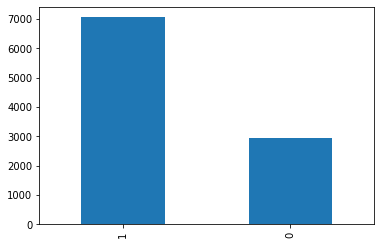

In [12]:
file['HasCrCard'].value_counts().plot.bar()
plt.show()

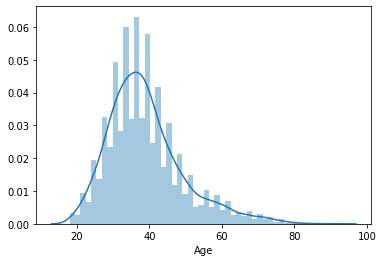

In [13]:
sn.distplot(file["Age"])
plt.show()

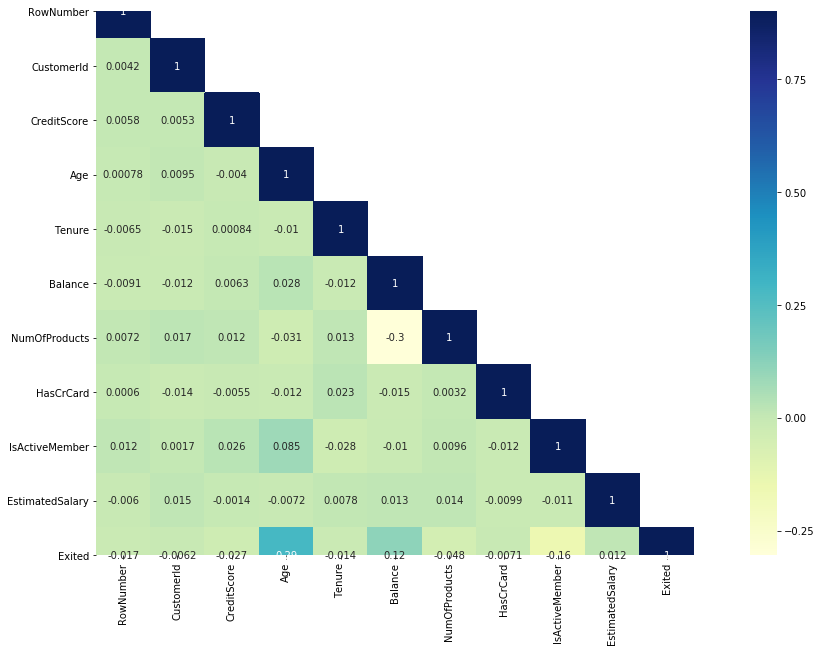

In [14]:
corr = file.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
plt.show()

# Model Building

In [15]:

X = file.iloc[:, 3:13].values
y = file.iloc[:, 13].values


## Splitting the categorical data

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()

X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()

X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])

X = onehotencoder.fit_transform(X).toarray()
X=X[:,1:]

C:\Users\D3XT3R\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Splitting the dataset into the Training set and Test set


In [19]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Feature Scaling


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
classifier =Sequential()

classifier.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=11))

classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

In [26]:
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))


In [30]:
#compile the ann
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


classifier.fit(X_train,y_train,batch_size=10,nb_epoch=200)

Epoch 1/200
8000/8000 [==============================] - 2s 204us/step - loss: 0.4004 - accuracy: 0.8355
Epoch 2/200
8000/8000 [==============================] - 1s 173us/step - loss: 0.4001 - accuracy: 0.8347
Epoch 3/200
8000/8000 [==============================] - 1s 169us/step - loss: 0.4002 - accuracy: 0.8351
Epoch 4/200
8000/8000 [==============================] - 2s 212us/step - loss: 0.4000 - accuracy: 0.8359
Epoch 5/200
8000/8000 [==============================] - 1s 185us/step - loss: 0.3999 - accuracy: 0.8332
Epoch 6/200
8000/8000 [==============================] - 1s 172us/step - loss: 0.3995 - accuracy: 0.8351
Epoch 7/200
8000/8000 [==============================] - 1s 172us/step - loss: 0.4001 - accuracy: 0.8353
Epoch 8/200
8000/8000 [==============================] - 1s 173us/step - loss: 0.3998 - accuracy: 0.8354
Epoch 9/200
8000/8000 [==============================] - 1s 171us/step - loss: 0.3999 - accuracy: 0.8357
Epoch 10/200
8000/8000 [==============================]

8000/8000 [==============================] - 1s 174us/step - loss: 0.3961 - accuracy: 0.8372
Epoch 78/200
8000/8000 [==============================] - 2s 189us/step - loss: 0.3965 - accuracy: 0.8378
Epoch 79/200
8000/8000 [==============================] - 2s 216us/step - loss: 0.3960 - accuracy: 0.8357
Epoch 80/200
8000/8000 [==============================] - 1s 185us/step - loss: 0.3958 - accuracy: 0.8356
Epoch 81/200
8000/8000 [==============================] - 2s 204us/step - loss: 0.3960 - accuracy: 0.8375
Epoch 82/200
8000/8000 [==============================] - 2s 190us/step - loss: 0.3960 - accuracy: 0.8353
Epoch 83/200
8000/8000 [==============================] - 2s 192us/step - loss: 0.3961 - accuracy: 0.8365
Epoch 84/200
8000/8000 [==============================] - 1s 183us/step - loss: 0.3957 - accuracy: 0.8370
Epoch 85/200
8000/8000 [==============================] - 2s 204us/step - loss: 0.3962 - accuracy: 0.8359
Epoch 86/200
8000/8000 [==============================] - 2

8000/8000 [==============================] - 1s 174us/step - loss: 0.3941 - accuracy: 0.8367
Epoch 154/200
8000/8000 [==============================] - 2s 211us/step - loss: 0.3948 - accuracy: 0.8384
Epoch 155/200
8000/8000 [==============================] - 1s 181us/step - loss: 0.3939 - accuracy: 0.8369
Epoch 156/200
8000/8000 [==============================] - 1s 173us/step - loss: 0.3942 - accuracy: 0.8379
Epoch 157/200
8000/8000 [==============================] - 1s 177us/step - loss: 0.3940 - accuracy: 0.8375
Epoch 158/200
8000/8000 [==============================] - 1s 176us/step - loss: 0.3941 - accuracy: 0.8378
Epoch 159/200
8000/8000 [==============================] - 1s 182us/step - loss: 0.3949 - accuracy: 0.8386
Epoch 160/200
8000/8000 [==============================] - 2s 234us/step - loss: 0.3939 - accuracy: 0.8365
Epoch 161/200
8000/8000 [==============================] - 1s 165us/step - loss: 0.3936 - accuracy: 0.8372
Epoch 162/200
8000/8000 [==========================

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
